In [94]:

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [95]:
df = pd.read_csv('data.csv')
df.drop(columns=['Age','Gender','Weight (kg)','Height (m)','Max_BPM','Resting_BPM','Session_Duration (hours)','Fat_Percentage','Water_Intake (liters)','Workout_Frequency (days/week)','Experience_Level'], inplace=True)

In [96]:
df.columns

Index(['Avg_BPM', 'Calories_Burned', 'Workout_Type', 'BMI'], dtype='object')

In [97]:
df.describe()

,Avg_BPM,Calories_Burned,BMI
count,973.000000,973.000000,973.000000
mean,143.766701,905.422405,24.912127
std,14.345101,272.641516,6.660879
min,120.000000,303.000000,12.320000
25%,131.000000,720.000000,20.110000
50%,143.000000,893.000000,24.160000
75%,156.000000,1076.000000,28.560000
max,169.000000,1783.000000,49.840000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Avg_BPM          973 non-null    int64  
 1   Calories_Burned  973 non-null    float64
 2   Workout_Type     973 non-null    object 
 3   BMI              973 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 30.5+ KB


In [99]:
df.head()

,Avg_BPM,Calories_Burned,Workout_Type,BMI
0,157,1313.0,Yoga,30.20
1,151,883.0,HIIT,32.00
2,122,677.0,Cardio,24.71
3,164,532.0,Strength,18.41
4,158,556.0,Strength,14.39


In [100]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                  Avg_BPM  Calories_Burned       BMI
Avg_BPM          1.000000         0.339659  0.021605
Calories_Burned  0.339659         1.000000  0.059761
BMI              0.021605         0.059761  1.000000


In [101]:
labelEncoder = LabelEncoder()

df["Workout_Type"] = labelEncoder.fit_transform(df["Workout_Type"])

<Axes: >

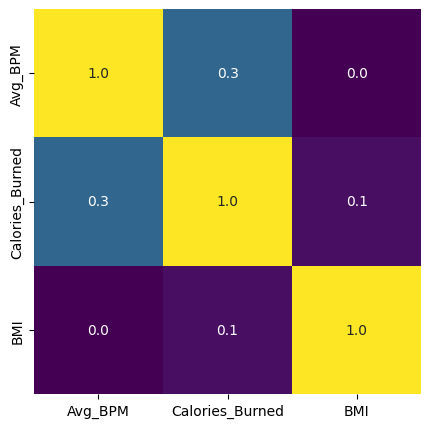

In [102]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cbar=None,cmap='viridis')

In [103]:
X = df.drop("Workout_Type", axis=1)
y = df["Workout_Type"].values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.23076923076923078


In [106]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada.fit(X_train, y_train)

# Evaluate
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.23076923076923078


In [107]:
# Train XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.23076923076923078


In [108]:
# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME'))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stack = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stack.fit(X_train, y_train)

# Evaluate
y_pred = stack.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.24615384615384617


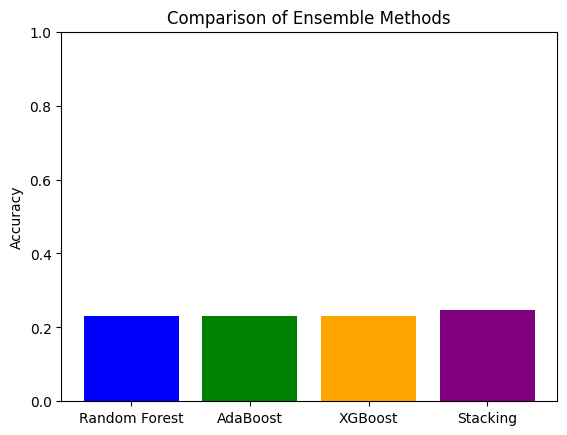

[0.23076923076923078, 0.23076923076923078, 0.23076923076923078, 0.24615384615384617]


In [109]:
models = ['Random Forest', 'AdaBoost', 'XGBoost', 'Stacking']
accuracies = [accuracy_score(y_test, rf.predict(X_test)),
              accuracy_score(y_test, ada.predict(X_test)),
              accuracy_score(y_test, xgb.predict(X_test)),
              accuracy_score(y_test, stack.predict(X_test))]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Ensemble Methods')
plt.ylim(0, 1.0)
plt.show()

print(accuracies)

In [110]:
# Define base models
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Hard Voting Classifier
voting_hard = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='hard')

voting_hard.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import accuracy_score
y_pred = voting_hard.predict(X_test)
print("Accuracy (Hard Voting):", accuracy_score(y_test, y_pred))


Accuracy (Hard Voting): 0.23076923076923078


In [111]:
# Soft Voting Classifier
voting_soft = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='soft')

voting_soft.fit(X_train, y_train)

# Evaluate
y_pred = voting_soft.predict(X_test)
print("Accuracy (Soft Voting):", accuracy_score(y_test, y_pred))


Accuracy (Soft Voting): 0.24102564102564103


In [112]:
# Weighted Voting Classifier
voting_weighted = VotingClassifier(estimators=[
    ('log_reg', log_reg), 
    ('rf', rf), 
    ('ada', ada)], voting='soft', weights=[1, 2, 3]) # Higher weight for AdaBoost

voting_weighted.fit(X_train, y_train)

# Evaluate
y_pred = voting_weighted.predict(X_test)
print("Accuracy (Weighted Voting):", accuracy_score(y_test, y_pred))


Accuracy (Weighted Voting): 0.2205128205128205
